In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [11]:
df = pd.read_csv('ecommerce_customer_data.csv', index_col=0)

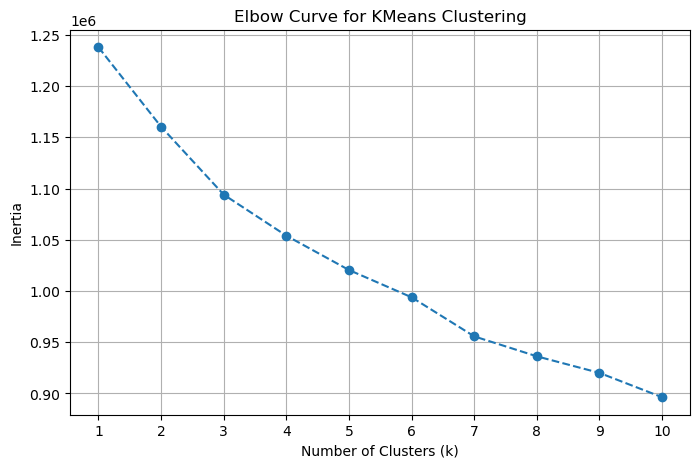

In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
data = df.copy()
# Convert categorical columns (True/False) to numeric using pd.get_dummies
data = pd.get_dummies(data, drop_first=True)

# Drop the UserID column for clustering
data_for_clustering = data.drop(columns=['UserID'], errors='ignore')

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

# Fit KMeans models for a range of cluster numbers
inertia = []
range_clusters = range(1, 11)  # Test cluster numbers from 1 to 10

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker='o', linestyle='--')
plt.title('Elbow Curve for KMeans Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range_clusters)
plt.grid(True)
plt.show()


In [16]:
data_noid = data.drop(columns=['UserID'])
data_noid

,TotalAmount,AvgAmount,MaxAmount,MinAmount,AmountStd,TransactionCount,Recency,PreferredHour,FraudRate,DeclineRate,...,Toys & Games,Travel,CompletedRate,FailedRate,PendingRate,PreferredPayment_Credit Card,PreferredPayment_Debit Card,PreferredPayment_PayPal,PreferredDevice_Mobile,PreferredDevice_Tablet
0,744628.05,7756.542188,13617.01,1849.05,3857.469258,96,6,11,0.031250,0.093750,...,9,0,0.593750,0.062116,0.341417,True,False,False,True,False
1,267745.35,5578.028125,13932.70,25.34,4295.277275,48,13,2,0.062500,0.062500,...,6,3,0.875000,0.061381,0.061304,False,True,False,True,False
2,587186.85,7829.158000,14839.74,524.56,4692.245814,75,29,3,0.040000,0.080000,...,6,6,0.800000,0.079156,0.118610,True,False,False,True,False
3,716990.91,8241.274828,14654.73,775.55,3907.163668,87,12,20,0.034483,0.172414,...,27,3,0.724138,0.068396,0.205029,False,True,False,True,False
4,506791.08,7678.652727,13744.94,829.46,4173.205202,66,6,11,0.227273,0.136364,...,12,12,0.590909,0.135154,0.269760,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38682,661293.39,7601.073448,14951.49,608.30,5136.208097,87,5,7,0.034483,0.103448,...,6,12,0.689655,0.102635,0.205029,True,False,False,True,False
38683,630554.73,7247.755517,13895.52,397.96,4340.511978,87,1,3,0.103448,0.206897,...,9,3,0.551724,0.171327,0.273588,True,False,False,True,False
38684,618477.30,7362.825000,14789.57,379.76,4433.046913,84,56,5,0.000000,0.071429,...,0,9,0.571429,0.070946,0.354432,True,False,False,True,False
38685,763392.39,7952.004063,14832.69,3.60,4956.736097,96,19,4,0.125000,0.125000,...,12,18,0.593750,0.186347,0.216987,True,False,False,True,False


Silhouette Score (Train): 0.52


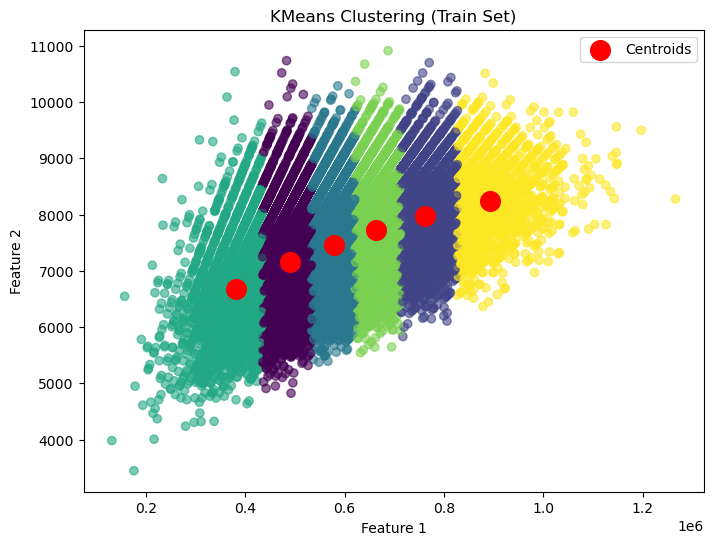

Cluster Centers:
[[ 4.89298755e+05  7.15336334e+03  1.43077955e+04  5.73164648e+02
   4.25191645e+03  6.91668449e+01  2.75709702e+01  8.25805959e+00
   5.03656181e-02  1.50828896e-01  3.91978610e+00  3.52707724e+01
  -9.75677459e+01  4.30440086e+01  1.82693656e+02  1.31883027e+03
   2.60534759e+00  1.04608098e+01  7.37555386e+00  1.68160428e+01
   1.30409473e+01  4.15278839e+00  9.51611917e+00  5.19923606e+00
   6.71848349e-01  1.03592243e-01  2.21184460e-01  8.73185638e-01
   9.61038961e-02  2.55156608e-02  8.67226891e-01  1.23758594e-02]
 [ 7.61707047e+05  7.97020343e+03  1.46265483e+04  5.33976290e+02
   4.27151098e+03  9.62428449e+01  2.01986331e+01  8.29624092e+00
   5.07816418e-02  1.49419568e-01  3.97244767e+00  3.57587818e+01
  -9.60611975e+01  4.30600018e+01  1.82704104e+02  1.46248336e+03
   3.65548911e+00  1.46027339e+01  1.01956429e+01  2.32701837e+01
   1.83575395e+01  5.86992738e+00  1.30617258e+01  7.22960273e+00
   6.74283228e-01  1.02297773e-01  2.20977944e-01  9.19051

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Define features (X) - Adjust this if you have a specific subset of columns to use
X = data_noid

# Train/Test Split
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# KMeans Clustering with 3 Clusters
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(X_train)

# Assign cluster labels to the training and test sets
X_train['cluster'] = kmeans.labels_
X_test['cluster'] = kmeans.predict(X_test)

# Evaluate the model using Silhouette Score
silhouette_avg = silhouette_score(X_train.drop('cluster', axis=1), X_train['cluster'])
print(f'Silhouette Score (Train): {silhouette_avg:.2f}')

# Optional: Visualize the clusters (using the first two dimensions for simplicity)
plt.figure(figsize=(8, 6))
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=X_train['cluster'], cmap='viridis', marker='o', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.title('KMeans Clustering (Train Set)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Optional: Display cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)


In [20]:
from sklearn.decomposition import PCA

# Apply PCA to reduce to 2 or 3 dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print(f"Explained variance by components: {pca.explained_variance_ratio_}")

Explained variance by components: [9.99926854e-01 3.61806808e-05]


In [21]:
correlation_matrix = X.corr()
print(correlation_matrix)

                              TotalAmount  AvgAmount  MaxAmount  MinAmount  \
TotalAmount                      1.000000   0.494837   0.317746  -0.021899   
AvgAmount                        0.494837   1.000000   0.320558   0.320202   
MaxAmount                        0.317746   0.320558   1.000000  -0.005315   
MinAmount                       -0.021899   0.320202  -0.005315   1.000000   
AmountStd                        0.033578  -0.001624   0.403461  -0.404193   
TransactionCount                 0.866149   0.005443   0.192080  -0.199922   
Recency                         -0.160496   0.001667  -0.038398   0.031534   
PreferredHour                    0.005299  -0.004115  -0.004015  -0.003342   
FraudRate                        0.002697   0.000073   0.005782   0.000736   
DeclineRate                     -0.004550  -0.002333   0.001072  -0.001549   
UniquePaymentMethods             0.137336   0.000118   0.033880  -0.036805   
Lat                              0.050486  -0.001871   0.015024 

### Refine features

In [28]:
features_to_keep = [
    'TotalAmount', 'AvgAmount', 'Recency', 'UniquePaymentMethods',
    'CompletedRate', 'Automotive', 'Clothing', 'Electronics',
    'Entertainment', 'Groceries', 'PreferredPayment_Credit Card',
    'PreferredDevice_Mobile'
]

X = data_noid[features_to_keep]
X

,TotalAmount,AvgAmount,Recency,UniquePaymentMethods,CompletedRate,Automotive,Clothing,Electronics,Entertainment,Groceries,PreferredPayment_Credit Card,PreferredDevice_Mobile
0,744628.05,7756.542188,6,4,0.593750,0,18,12,24,24,True,True
1,267745.35,5578.028125,13,3,0.875000,3,3,6,12,12,False,True
2,587186.85,7829.158000,29,4,0.800000,12,3,12,15,18,True,True
3,716990.91,8241.274828,12,4,0.724138,0,9,9,15,21,False,True
4,506791.08,7678.652727,6,4,0.590909,0,15,9,3,15,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
38682,661293.39,7601.073448,5,4,0.689655,9,18,9,6,21,True,True
38683,630554.73,7247.755517,1,4,0.551724,6,18,6,18,27,True,True
38684,618477.30,7362.825000,56,4,0.571429,0,15,15,27,15,True,True
38685,763392.39,7952.004063,19,4,0.593750,0,15,12,24,9,True,True


Silhouette Score (Train): 0.52


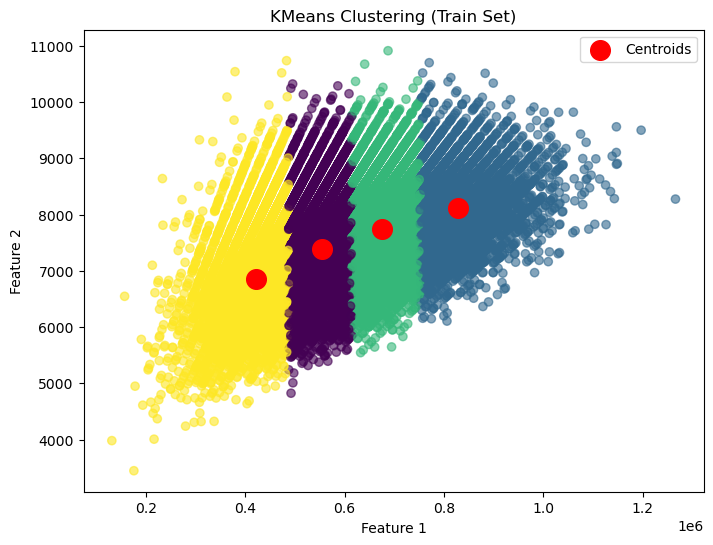

Cluster Centers:
[[5.53865483e+05 7.38139115e+03 2.52923233e+01 3.93576629e+00
  6.71106461e-01 2.89494056e+00 1.14274260e+01 8.12358308e+00
  1.83110312e+01 1.43392314e+01 8.88673855e-01 8.89503272e-01]
 [8.29356422e+05 8.11811010e+03 1.92992467e+01 3.97534809e+00
  6.72854072e-01 3.87582744e+00 1.55546679e+01 1.08078064e+01
  2.49593700e+01 1.95147227e+01 9.26272541e-01 9.24902990e-01]
 [6.74700557e+05 7.74963641e+03 2.20038011e+01 3.96147524e+00
  6.72765526e-01 3.34918841e+00 1.32106020e+01 9.25950277e+00
  2.13094309e+01 1.66343744e+01 9.02095747e-01 9.14012739e-01]
 [4.21143483e+05 6.86113800e+03 3.09969915e+01 3.88149758e+00
  6.69884605e-01 2.28146415e+00 9.39110814e+00 6.53601872e+00
  1.51293665e+01 1.16745780e+01 8.50910914e-01 8.54086579e-01]]


In [29]:
# Train/Test Split
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# KMeans Clustering with 3 Clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_train)

# Assign cluster labels to the training and test sets
X_train['cluster'] = kmeans.labels_
X_test['cluster'] = kmeans.predict(X_test)

# Evaluate the model using Silhouette Score
silhouette_avg = silhouette_score(X_train.drop('cluster', axis=1), X_train['cluster'])
print(f'Silhouette Score (Train): {silhouette_avg:.2f}')

# Optional: Visualize the clusters (using the first two dimensions for simplicity)
plt.figure(figsize=(8, 6))
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=X_train['cluster'], cmap='viridis', marker='o', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.title('KMeans Clustering (Train Set)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Optional: Display cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)

### Refine 2

In [60]:
features_to_keep = [
    'AvgAmount', 'TransactionCount', 'Recency', 'PreferredHour', 'AvgCustomerAge', 
    'Automotive', 'DeclineRate', 'Toys & Games', 'Electronics'
]

X = data_noid[features_to_keep]
X

,AvgAmount,TransactionCount,Recency,PreferredHour,AvgCustomerAge,Automotive,DeclineRate,Toys & Games,Electronics
0,7756.542188,96,6,11,42.656250,0,0.093750,9,12
1,5578.028125,48,13,2,31.437500,3,0.062500,6,6
2,7829.158000,75,29,3,50.880000,12,0.080000,6,12
3,8241.274828,87,12,20,43.517241,0,0.172414,27,9
4,7678.652727,66,6,11,44.363636,0,0.136364,12,9
...,...,...,...,...,...,...,...,...,...
38682,7601.073448,87,5,7,43.241379,9,0.103448,6,9
38683,7247.755517,87,1,3,43.000000,6,0.206897,9,6
38684,7362.825000,84,56,5,34.464286,0,0.071429,0,15
38685,7952.004063,96,19,4,51.093750,0,0.125000,12,12


Silhouette Score (Train): 0.52


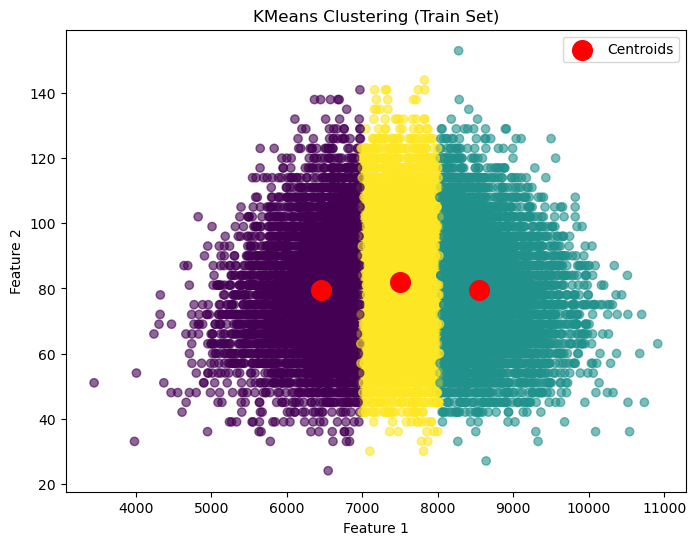

Cluster Centers:
[[6.45855406e+03 7.93968998e+01 2.49741649e+01 8.09468878e+00
  4.30783671e+01 2.97728911e+00 1.50658005e-01 1.08720260e+01
  8.45746215e+00]
 [8.55055255e+03 7.95632988e+01 2.49088498e+01 8.13105860e+00
  4.30378518e+01 2.95478659e+00 1.49840335e-01 1.08258982e+01
  8.47299252e+00]
 [7.49875779e+03 8.20655829e+01 2.40150701e+01 8.25954092e+00
  4.29258889e+01 3.16472476e+00 1.50287035e-01 1.12837508e+01
  8.65673620e+00]]


In [61]:
# Train/Test Split
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# KMeans Clustering with 3 Clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train)

# Assign cluster labels to the training and test sets
X_train['cluster'] = kmeans.labels_
X_test['cluster'] = kmeans.predict(X_test)

# Evaluate the model using Silhouette Score
silhouette_avg = silhouette_score(X_train.drop('cluster', axis=1), X_train['cluster'])
print(f'Silhouette Score (Train): {silhouette_avg:.2f}')

# Optional: Visualize the clusters (using the first two dimensions for simplicity)
plt.figure(figsize=(8, 6))
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=X_train['cluster'], cmap='viridis', marker='o', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.title('KMeans Clustering (Train Set)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Optional: Display cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)

## Supervised

In [64]:
data_noid

,TotalAmount,AvgAmount,MaxAmount,MinAmount,AmountStd,TransactionCount,Recency,PreferredHour,FraudRate,DeclineRate,...,Toys & Games,Travel,CompletedRate,FailedRate,PendingRate,PreferredPayment_Credit Card,PreferredPayment_Debit Card,PreferredPayment_PayPal,PreferredDevice_Mobile,PreferredDevice_Tablet
0,744628.05,7756.542188,13617.01,1849.05,3857.469258,96,6,11,0.031250,0.093750,...,9,0,0.593750,0.062116,0.341417,True,False,False,True,False
1,267745.35,5578.028125,13932.70,25.34,4295.277275,48,13,2,0.062500,0.062500,...,6,3,0.875000,0.061381,0.061304,False,True,False,True,False
2,587186.85,7829.158000,14839.74,524.56,4692.245814,75,29,3,0.040000,0.080000,...,6,6,0.800000,0.079156,0.118610,True,False,False,True,False
3,716990.91,8241.274828,14654.73,775.55,3907.163668,87,12,20,0.034483,0.172414,...,27,3,0.724138,0.068396,0.205029,False,True,False,True,False
4,506791.08,7678.652727,13744.94,829.46,4173.205202,66,6,11,0.227273,0.136364,...,12,12,0.590909,0.135154,0.269760,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38682,661293.39,7601.073448,14951.49,608.30,5136.208097,87,5,7,0.034483,0.103448,...,6,12,0.689655,0.102635,0.205029,True,False,False,True,False
38683,630554.73,7247.755517,13895.52,397.96,4340.511978,87,1,3,0.103448,0.206897,...,9,3,0.551724,0.171327,0.273588,True,False,False,True,False
38684,618477.30,7362.825000,14789.57,379.76,4433.046913,84,56,5,0.000000,0.071429,...,0,9,0.571429,0.070946,0.354432,True,False,False,True,False
38685,763392.39,7952.004063,14832.69,3.60,4956.736097,96,19,4,0.125000,0.125000,...,12,18,0.593750,0.186347,0.216987,True,False,False,True,False


In [73]:
# Create binary target variable for high engagement
df = data.copy()

df['HighEngagement'] = (
    (df['TransactionCount'] > df['TransactionCount'].quantile(0.75)) & 
    (df['Recency'] < df['Recency'].quantile(0.25)) & 
    (df['AvgAmount'] > df['AvgAmount'].median())
).astype(int)

# Check the distribution of the target
print(df['HighEngagement'].value_counts())


HighEngagement
0    37639
1     1048
Name: count, dtype: int64


In [74]:
# Features and target
features = ['TotalAmount', 'MaxAmount', 'MinAmount',
       'AmountStd','PreferredHour',
       'FraudRate', 'DeclineRate', 'UniquePaymentMethods', 
        'AvgBasketSize', 'Automotive',
       'Clothing', 'Electronics', 'Entertainment', 'Groceries',
       'Home & Garden', 'Toys & Games', 'Travel', 'CompletedRate',
       'FailedRate', 'PendingRate']

target = 'HighEngagement'

X = df[features]
y = df[target]

# Normalize numeric features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [79]:
!pip install xgboost
from xgboost import XGBClassifier

xgb = XGBClassifier(scale_pos_weight=34, random_state=42)  # Adjust scale_pos_weight
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print(classification_report(y_test, y_pred))


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.4 MB/s eta 0:00:0000:0100:01
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      7517
           1       0.19      0.34      0.24       221

    accuracy                           0.94      7738
   macro avg       0.58      0.65      0.60      7738
weighted avg       0.96      0.94      0.95      7738



In [81]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.94
